#  Homework

In [1]:
#  load the handwritten digits
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
np.random.seed(42)

digits = load_digits()
print('\nDigits shape:', digits.data.shape)

def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))


Digits shape: (1797, 64)


<br><br> <b> 1.  Repeat the digits example using 5 componets.  How much of the variance is explained?

original image


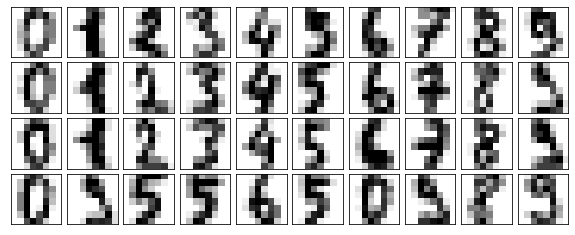

In [2]:
print('original image')
plot_digits(digits.data)

Noisy image


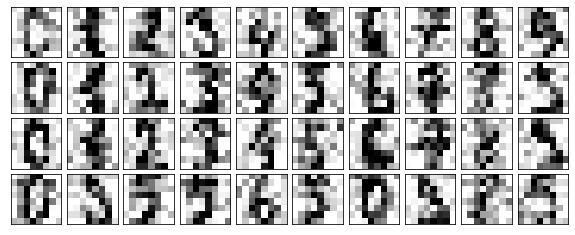

In [3]:
print('Noisy image')
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

Our PCA'd image without noise


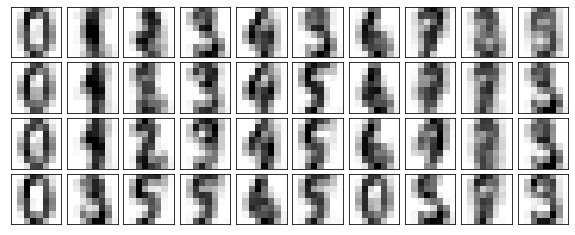

In [4]:
pca = PCA(n_components = 5)  # project from 64 to 5 dimensions
projected = pca.fit_transform(digits.data)
filtered = pca.inverse_transform(projected)
plot_digits(filtered)
print("Our PCA'd image without noise")

Our PCA'd image with noise


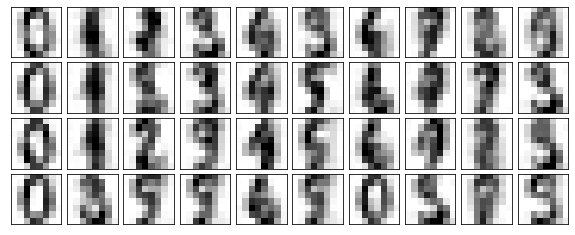

In [5]:
pca = PCA(n_components = 5)  # project from 64 to 5 dimensions
projected = pca.fit_transform(noisy)
filtered = pca.inverse_transform(projected)
plot_digits(filtered)
print("Our PCA'd image with noise")

In [6]:
pca.fit(noisy)
print('\nExplained Variance Ratio:', round(sum(pca.explained_variance_ratio_),2))


Explained Variance Ratio: 0.33


<p style="color:blue;">It looks like the noise makes very little difference in the quality of the image after using PCA to reduce the dimensionality of the image. This is worth noting, since noise is often present in photos. Another thing to note is that the digits are pretty recognizeable despite taking MUCH less space. Scikit learn estimated that 33% of the data is retained after reducing to 5 dimensions, which is a pretty decent retention rate. I think that personally, most of the variance is explained since the images vary very stightly from their original after the inverse transform</p>


<br><br><b> 2.  Repeat the digits example using 20 components.  How much of the variance is explained?


Expained Variance Ratio: 0.89


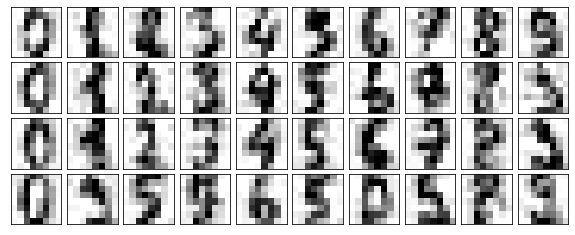

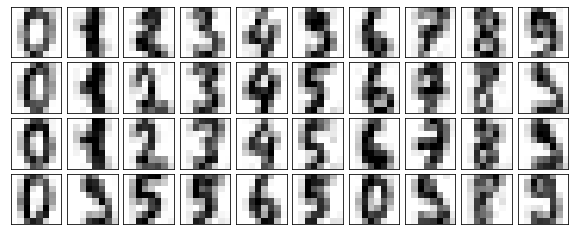

In [7]:
pca = PCA(n_components = 20)
noisy = np.random.normal(digits.data, 4)
projected = pca.fit_transform(noisy)
filtered = pca.inverse_transform(projected)
plot_digits(filtered)
pca.fit(digits.data)
print('\nExpained Variance Ratio:', round(sum(pca.explained_variance_ratio_),2))
projected = pca.fit_transform(digits.data)
filtered = pca.inverse_transform(projected)
plot_digits(filtered)

<p style="color:blue;">In this example, it looks like a PCA transform with 20 components might be less useful than a PCA transform of 5 components, since it retains most of the noise and explains an estimated 89% of the data in the noisy images, which may be more than we really want. However. it may be more useful if we were to use data without noise, since the PCA tranform does retain more data, even though it is hard for me to see in the photo.</p>

<br><br><b> 3.  Repeat the digits example using 40 components.  How much of the variance is explained?


Expained Variance Ratio: 0.99


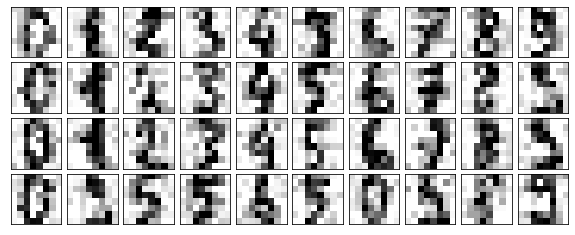

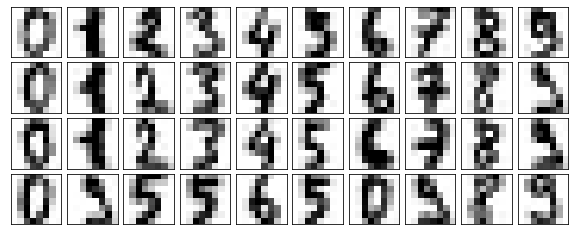

In [8]:
pca = PCA(n_components = 40)
noisy = np.random.normal(digits.data, 4)
projected = pca.fit_transform(noisy)
filtered = pca.inverse_transform(projected)
plot_digits(filtered)
pca.fit(digits.data)
print('\nExpained Variance Ratio:', round(sum(pca.explained_variance_ratio_),2))
projected = pca.fit_transform(digits.data)
filtered = pca.inverse_transform(projected)
plot_digits(filtered)

<p style="color:blue;">This data after the PCA transformation is essentially the exact same photo as in the original. It's not useful for removing noise, but it does do a great job of compressing our data.</p>

<br><br><b> 4.  Describe the results that you obtain.

<p style="color:blue;">Using the PCA transforms on the digits data, I've learned that PCA tranforms hold a ridiculous amount of data in the photo while still compressing the data to be much smaller. Even after reducing 64 components to 5, the data still is recognizeable, and in fact looks the same as earlier. It is great at removing noise without significantly affecting the image, and next time I do any maching learning projects I'm going to make sure that I use PCA, since it allows so much data to be stored so efficiently. </p>